In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

path = "C:/Windows/Fonts/H2GTRM.TTF"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
import os
print(os.listdir())

['code_jeongyeon.ipynb', 'sample_submission.csv', 'test.csv', 'train.csv']


In [4]:
sub = pd.read_csv("sample_submission.csv")
tr = pd.read_csv("train.csv")
te = pd.read_csv("test.csv")

# 전처리

In [5]:
print(tr.shape)
tr.head

(2207, 184)


<bound method NDFrame.head of               ID  착과량(int)  수고(m)  수관폭1(min)  수관폭2(max)  수관폭평균  2022-09-01 새순  \
0     TRAIN_0000       692  275.0      287.0      292.0  289.5            2.8   
1     TRAIN_0001       534  293.0      284.0      336.0  310.0            3.3   
2     TRAIN_0002       634  300.0      392.0      450.0  421.0            3.0   
3     TRAIN_0003       639  289.0      368.0      379.0  373.5            3.1   
4     TRAIN_0004       496  306.0      353.0      358.0  355.5            3.7   
...          ...       ...    ...        ...        ...    ...            ...   
2202  TRAIN_2202       119  230.0      353.0      367.0  360.0            4.7   
2203  TRAIN_2203       611  266.0      337.0      400.0  368.5            3.1   
2204  TRAIN_2204       650  237.0      353.0      362.0  357.5            3.0   
2205  TRAIN_2205       363  281.0      337.0      403.0  370.0            3.9   
2206  TRAIN_2206        17  228.0      389.0      398.0  393.5            5.3  

In [6]:
tr.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [7]:
pd.set_option('display.max_seq_items', None)

In [7]:
tr.columns.unique()

Index(['ID', '착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균',
       '2022-09-01 새순', '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순',
       ...
       '2022-11-19 엽록소', '2022-11-20 엽록소', '2022-11-21 엽록소', '2022-11-22 엽록소',
       '2022-11-23 엽록소', '2022-11-24 엽록소', '2022-11-25 엽록소', '2022-11-26 엽록소',
       '2022-11-27 엽록소', '2022-11-28 엽록소'],
      dtype='object', length=184)

In [8]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Columns: 184 entries, ID to 2022-11-28 엽록소
dtypes: float64(182), int64(1), object(1)
memory usage: 3.1+ MB


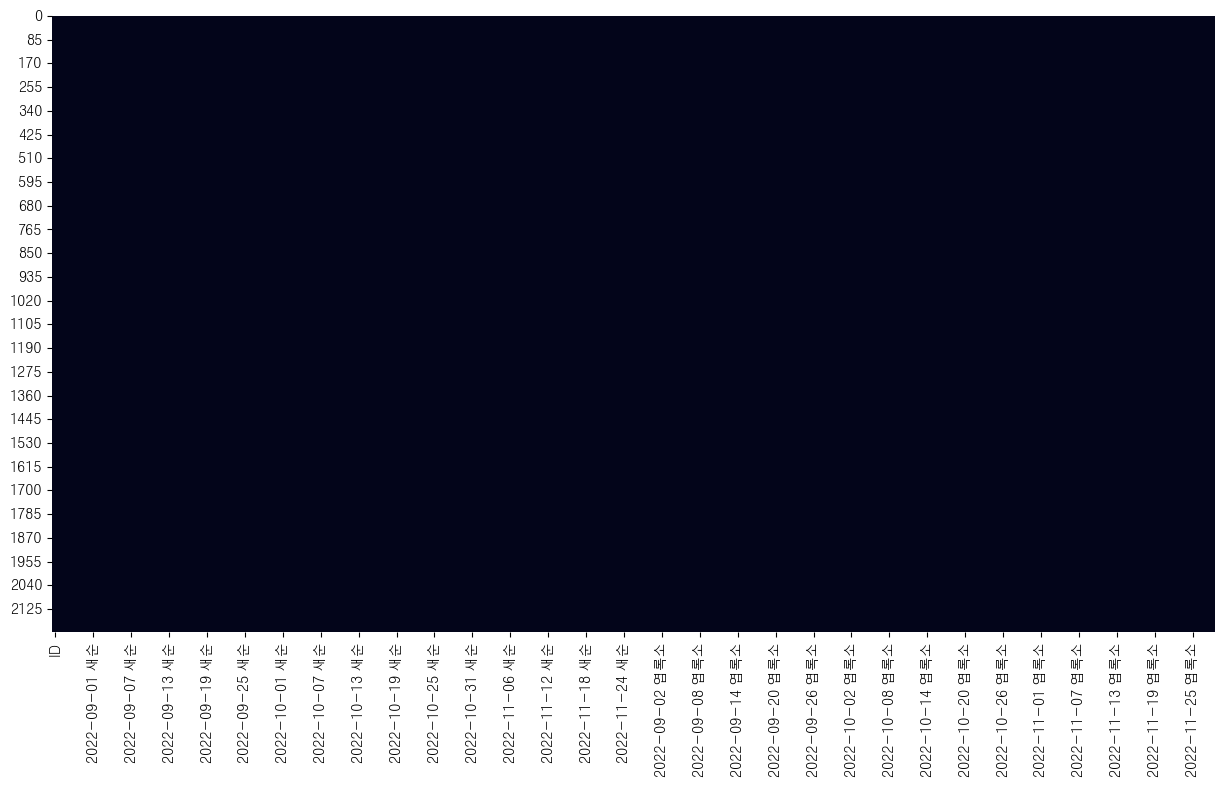

In [9]:
# 결측치 확인 (컬럼이 너무 많아서 시각화로 확인)
%matplotlib inline
sns.heatmap(tr.isnull(), cbar=False)
plt.gcf().set_size_inches(15, 8)


In [11]:
te.columns.unique()

Index(['ID', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균', '2022-09-01 새순',
       '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순', '2022-09-05 새순',
       '2022-09-06 새순', '2022-09-07 새순', '2022-09-08 새순', '2022-09-09 새순',
       '2022-09-10 새순', '2022-09-11 새순', '2022-09-12 새순', '2022-09-13 새순',
       '2022-09-14 새순', '2022-09-15 새순', '2022-09-16 새순', '2022-09-17 새순',
       '2022-09-18 새순', '2022-09-19 새순', '2022-09-20 새순', '2022-09-21 새순',
       '2022-09-22 새순', '2022-09-23 새순', '2022-09-24 새순', '2022-09-25 새순',
       '2022-09-26 새순', '2022-09-27 새순', '2022-09-28 새순', '2022-09-29 새순',
       '2022-09-30 새순', '2022-10-01 새순', '2022-10-02 새순', '2022-10-03 새순',
       '2022-10-04 새순', '2022-10-05 새순', '2022-10-06 새순', '2022-10-07 새순',
       '2022-10-08 새순', '2022-10-09 새순', '2022-10-10 새순', '2022-10-11 새순',
       '2022-10-12 새순', '2022-10-13 새순', '2022-10-14 새순', '2022-10-15 새순',
       '2022-10-16 새순', '2022-10-17 새순', '2022-10-18 새순', '2022-10-19 새순',
       '2022-10-20 새순', '2

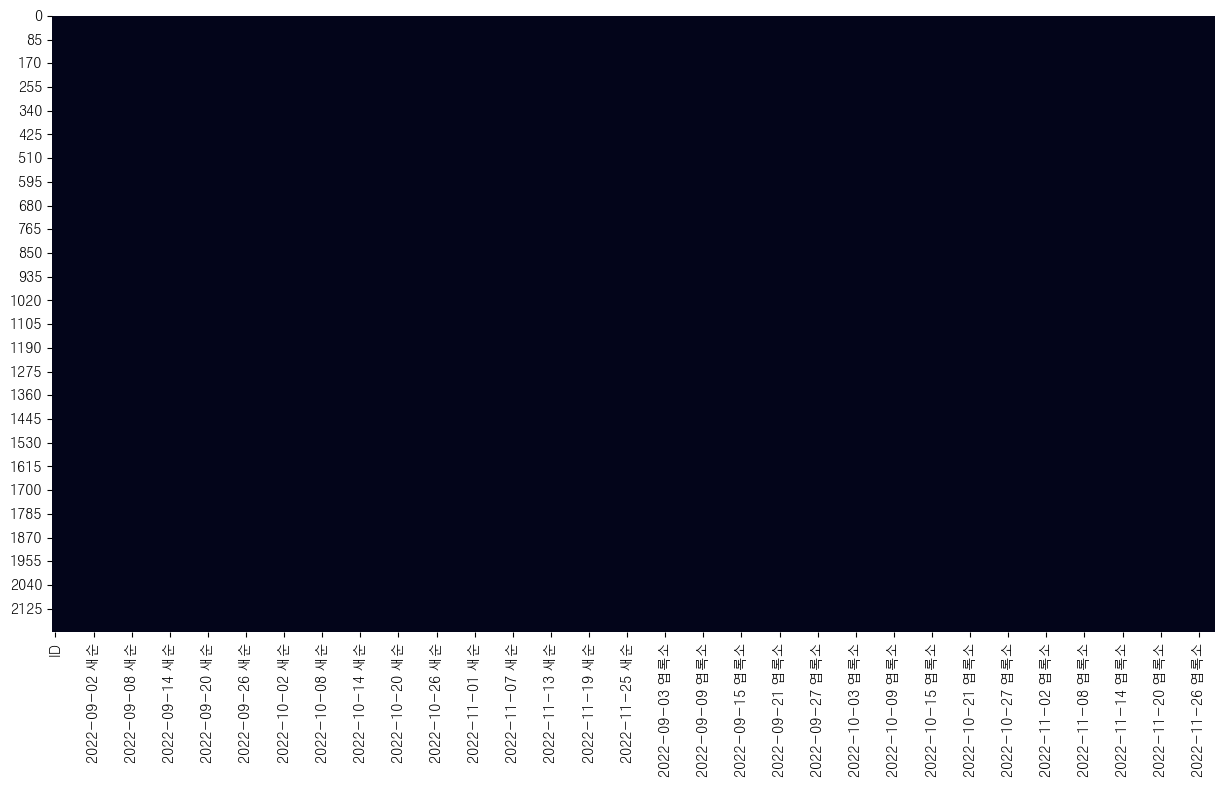

In [10]:
# 결측치 확인 (컬럼이 너무 많아서 시각화로 확인)
%matplotlib inline
sns.heatmap(te.isnull(), cbar=False)
plt.gcf().set_size_inches(15, 8)

### 아.. 컬럼이 너무 많아서 나누자

In [11]:
amout = ['착과량(int)']
id_c = list(tr.columns[2:6])
new = list(tr.columns[6:95])
yuprok = list(tr.columns[95:])

In [12]:
# 데이터 합치기 

"""
데이터 처리를 위한 멜팅 작업
"""
tr_melt = tr.melt(id_vars=['ID']+amout+id_c, value_vars=new+yuprok)
te_melt = te.melt(id_vars=['ID']+id_c, value_vars=new+yuprok)

tr_melt['date'] = tr_melt['variable'].apply(lambda x: x.split(' ')[0])
tr_melt['type'] = tr_melt['variable'].apply(lambda x: x.split(' ')[1])

te_melt['date'] = te_melt['variable'].apply(lambda x: x.split(' ')[0])
te_melt['type'] = te_melt['variable'].apply(lambda x: x.split(' ')[1])


In [13]:
tr_melt

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,variable,value,date,type
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2022-09-01 새순,2.800000,2022-09-01,새순
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,2022-09-01 새순,3.300000,2022-09-01,새순
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,2022-09-01 새순,3.000000,2022-09-01,새순
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,2022-09-01 새순,3.100000,2022-09-01,새순
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,2022-09-01 새순,3.700000,2022-09-01,새순
...,...,...,...,...,...,...,...,...,...,...
392841,TRAIN_2202,119,230.0,353.0,367.0,360.0,2022-11-28 엽록소,65.560547,2022-11-28,엽록소
392842,TRAIN_2203,611,266.0,337.0,400.0,368.5,2022-11-28 엽록소,72.944396,2022-11-28,엽록소
392843,TRAIN_2204,650,237.0,353.0,362.0,357.5,2022-11-28 엽록소,66.479459,2022-11-28,엽록소
392844,TRAIN_2205,363,281.0,337.0,403.0,370.0,2022-11-28 엽록소,65.812084,2022-11-28,엽록소


In [14]:
tr_melt_preproc = tr_melt[['ID']+amout+id_c+['date']].drop_duplicates().reset_index(drop=True).merge(
    tr_melt[tr_melt['type']=='새순'][['ID', 'date', 'value']].rename(columns={'value':'새순'}),
    how='left'
).merge(
    tr_melt[(tr_melt['type']=='새순')&(tr_melt['date']=='2022-09-01')][['ID', 'value']].rename(columns={'value':'새순0'}),
    how='left'
).merge(
    tr_melt[(tr_melt['type']=='새순')&(tr_melt['date']=='2022-10-15')][['ID', 'value']].rename(columns={'value':'새순1'}),
    how='left'
).merge(
    tr_melt[tr_melt['type']=='엽록소'][['ID', 'date', 'value']].rename(columns={'value':'엽록소'}),
    how='left'
)
tr_melt_preproc['새순diff0'] = tr_melt_preproc['새순']-tr_melt_preproc['새순0']
tr_melt_preproc['새순diff1'] = tr_melt_preproc['새순']-tr_melt_preproc['새순1']
tr_melt_preproc['엽록소_새순'] = tr_melt_preproc['엽록소']/(tr_melt_preproc['새순']+0.1)  # 분모 0 방지

In [15]:
tr_melt_preproc

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,date,새순,새순0,새순1,엽록소,새순diff0,새순diff1,엽록소_새순
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2022-09-01,2.8,2.8,1.7,78.336504,0.0,1.1,27.012587
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,2022-09-01,3.3,3.3,1.9,80.116691,0.0,1.4,23.563733
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,2022-09-01,3.0,3.0,1.8,79.118529,0.0,1.2,25.522106
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,2022-09-01,3.1,3.1,1.9,77.936262,0.0,1.2,24.355082
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,2022-09-01,3.7,3.7,2.1,76.233231,0.0,1.6,20.061377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196418,TRAIN_2202,119,230.0,353.0,367.0,360.0,2022-11-28,0.0,4.7,2.5,65.560547,-4.7,-2.5,655.605473
196419,TRAIN_2203,611,266.0,337.0,400.0,368.5,2022-11-28,0.6,3.1,1.9,72.944396,-2.5,-1.3,104.206281
196420,TRAIN_2204,650,237.0,353.0,362.0,357.5,2022-11-28,0.5,3.0,1.8,66.479459,-2.5,-1.3,110.799099
196421,TRAIN_2205,363,281.0,337.0,403.0,370.0,2022-11-28,0.0,3.9,2.2,65.812084,-3.9,-2.2,658.120840


In [16]:
te_melt_preproc = te_melt[['ID']+id_c+['date']].drop_duplicates().reset_index(drop=True).merge(
    te_melt[te_melt['type']=='새순'][['ID', 'date', 'value']].rename(columns={'value':'새순'}),
    how='left'
).merge(
    te_melt[(te_melt['type']=='새순')&(te_melt['date']=='2022-09-01')][['ID', 'value']].rename(columns={'value':'새순0'}),
    how='left'
).merge(
    te_melt[(te_melt['type']=='새순')&(te_melt['date']=='2022-10-15')][['ID', 'value']].rename(columns={'value':'새순1'}),
    how='left'
).merge(
    te_melt[te_melt['type']=='엽록소'][['ID', 'date', 'value']].rename(columns={'value':'엽록소'}),
    how='left'
)
te_melt_preproc['새순diff0'] = te_melt_preproc['새순']-te_melt_preproc['새순0']
te_melt_preproc['새순diff1'] = te_melt_preproc['새순']-te_melt_preproc['새순1']
te_melt_preproc['엽록소_새순'] = te_melt_preproc['엽록소']/(te_melt_preproc['새순']+0.1) # 분모 0 방지
te_melt_preproc

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,date,새순,새순0,새순1,엽록소,새순diff0,새순diff1,엽록소_새순
0,TEST_0000,231.0,219.0,302.0,260.5,2022-09-01,4.3,4.3,2.3,80.299924,0.0,2.0,18.249983
1,TEST_0001,206.0,324.0,346.0,335.0,2022-09-01,2.5,2.5,1.6,75.389791,0.0,0.9,28.996074
2,TEST_0002,282.0,373.0,404.0,388.5,2022-09-01,4.7,4.7,2.6,82.042248,0.0,2.1,17.092135
3,TEST_0003,234.0,337.0,357.0,347.0,2022-09-01,3.6,3.6,2.1,81.213424,0.0,1.5,21.949574
4,TEST_0004,222.0,329.0,347.0,338.0,2022-09-01,2.7,2.7,1.7,80.665529,0.0,1.0,28.809118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196507,TEST_2203,217.0,265.0,288.0,276.5,2022-11-28,0.6,2.5,1.5,69.601365,-1.9,-0.9,99.430521
196508,TEST_2204,182.0,191.0,262.0,226.5,2022-11-28,0.0,4.1,2.3,65.632342,-4.1,-2.3,656.323420
196509,TEST_2205,254.0,280.0,332.0,306.0,2022-11-28,0.6,3.8,2.2,62.307955,-3.2,-1.6,89.011365
196510,TEST_2206,257.0,285.0,297.0,291.0,2022-11-28,0.0,4.5,2.5,63.343589,-4.5,-2.5,633.435889


In [17]:
tr_df = tr_melt_preproc.pivot(index=['ID']+amout+id_c, columns=['date'], values=['새순diff0','새순diff1','새순', '엽록소_새순']).reset_index()
te_df = te_melt_preproc.pivot(index=['ID']+id_c, columns=['date'], values=['새순diff0','새순diff1', '새순', '엽록소_새순']).reset_index()

In [18]:
tr_df.head()

ID 착과량(int)  수고(m) 수관폭1(min) 수관폭2(max)  수관폭평균    새순diff0  \
date                                                        2022-09-01   
0     TRAIN_0000      692  275.0     287.0     292.0  289.5        0.0   
1     TRAIN_0001      534  293.0     284.0     336.0  310.0        0.0   
2     TRAIN_0002      634  300.0     392.0     450.0  421.0        0.0   
3     TRAIN_0003      639  289.0     368.0     379.0  373.5        0.0   
4     TRAIN_0004      496  306.0     353.0     358.0  355.5        0.0   

                                       ...     엽록소_새순                         \
date 2022-09-02 2022-09-03 2022-09-04  ... 2022-11-19 2022-11-20  2022-11-21   
0           0.0       -0.1       -0.1  ...  70.978249  78.751993   78.561392   
1           0.0        0.0       -0.1  ...  89.419354  89.227879  101.790862   
2          -0.1       -0.1       -0.1  ...  79.199782  79.110633   88.930026   
3          -0.1       -0.1       -0.1  ...  69.934615  69.884124   69.845683   
4          -0.1       -0.1       -0.1  ...  68.313016  68.285364   75.788734   

                                                                              \
date  2022-11-22  2022-11-23  2022-11-24  2022-11-25  2022-11-26  2022-11-27   
0      78.399559   88.034195   87.925614   87.867287   87.828027   87.712301   
1     101.560951  101.365154  117.994384  705.975500  705.650877  705.605022   
2      88.783425   88.650048   88.595904  101.014470  100.851388  100.597433   
3      77.549647   77.533125   77.349604   77.172671   86.601987   86.548361   
4      75.788286   75.600092   84.824954   84.719445   84.626821   96.434635   

                  
date  2022-11-28  
0     100.061788  
1     704.276003  
2     117.332631  
3      86.417462  
4      96.300133  

[5 rows x 362 columns]

In [19]:
vars = []
for x in tr_df.columns:
    if x[1]=='':
        vars.append(x[0])
    else:
        vars.append(x[0]+ ' ' + x[1])

tr_df.columns = vars
te_df.columns  = ['ID']+ vars[2:]

In [20]:
tr_df.columns

Index(['ID', '착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균',
       '새순diff0 2022-09-01', '새순diff0 2022-09-02', '새순diff0 2022-09-03',
       '새순diff0 2022-09-04',
       ...
       '엽록소_새순 2022-11-19', '엽록소_새순 2022-11-20', '엽록소_새순 2022-11-21',
       '엽록소_새순 2022-11-22', '엽록소_새순 2022-11-23', '엽록소_새순 2022-11-24',
       '엽록소_새순 2022-11-25', '엽록소_새순 2022-11-26', '엽록소_새순 2022-11-27',
       '엽록소_새순 2022-11-28'],
      dtype='object', length=362)

In [21]:
tr_df.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,새순diff0 2022-09-01,새순diff0 2022-09-02,새순diff0 2022-09-03,새순diff0 2022-09-04,...,엽록소_새순 2022-11-19,엽록소_새순 2022-11-20,엽록소_새순 2022-11-21,엽록소_새순 2022-11-22,엽록소_새순 2022-11-23,엽록소_새순 2022-11-24,엽록소_새순 2022-11-25,엽록소_새순 2022-11-26,엽록소_새순 2022-11-27,엽록소_새순 2022-11-28
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,0.0,0.0,-0.1,-0.1,...,70.978249,78.751993,78.561392,78.399559,88.034195,87.925614,87.867287,87.828027,87.712301,100.061788
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,0.0,0.0,0.0,-0.1,...,89.419354,89.227879,101.790862,101.560951,101.365154,117.994384,705.975500,705.650877,705.605022,704.276003
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,0.0,-0.1,-0.1,-0.1,...,79.199782,79.110633,88.930026,88.783425,88.650048,88.595904,101.014470,100.851388,100.597433,117.332631
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,0.0,-0.1,-0.1,-0.1,...,69.934615,69.884124,69.845683,77.549647,77.533125,77.349604,77.172671,86.601987,86.548361,86.417462
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,0.0,-0.1,-0.1,-0.1,...,68.313016,68.285364,75.788734,75.788286,75.600092,84.824954,84.719445,84.626821,96.434635,96.300133


### 모델링

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [23]:
x_train, x_test, y_train, y_test = train_test_split(tr_df.iloc[:,2:] , tr_df['착과량(int)'], test_size=0.4, random_state=1740)


In [24]:
x_train

,수고(m),수관폭1(min),수관폭2(max),수관폭평균,새순diff0 2022-09-01,새순diff0 2022-09-02,새순diff0 2022-09-03,새순diff0 2022-09-04,새순diff0 2022-09-05,새순diff0 2022-09-06,...,엽록소_새순 2022-11-19,엽록소_새순 2022-11-20,엽록소_새순 2022-11-21,엽록소_새순 2022-11-22,엽록소_새순 2022-11-23,엽록소_새순 2022-11-24,엽록소_새순 2022-11-25,엽록소_새순 2022-11-26,엽록소_새순 2022-11-27,엽록소_새순 2022-11-28
1306,210.0,222.0,274.0,248.0,0.0,0.0,-0.1,-0.1,-0.1,-0.2,...,72.215664,80.124453,79.992114,89.823452,89.627708,89.385364,102.095508,102.090777,118.801387,712.449158
1853,279.0,337.0,398.0,367.5,0.0,-0.1,-0.1,-0.1,-0.2,-0.2,...,65.371534,72.486796,72.264668,72.134307,81.018362,80.919913,92.360754,92.093008,107.415084,644.169286
1904,270.0,406.0,444.0,425.0,0.0,-0.1,-0.1,-0.2,-0.2,-0.2,...,81.382755,81.317743,91.265536,91.191705,104.045465,103.911730,103.898693,121.067703,725.272900,724.823415
1876,234.0,313.0,351.0,332.0,0.0,0.0,-0.1,-0.1,-0.2,-0.2,...,70.189323,77.773394,77.639535,87.214978,87.094430,99.334957,99.306697,115.645834,693.311606,691.650096
1921,194.0,232.0,243.0,237.5,0.0,0.0,-0.1,-0.1,-0.1,-0.2,...,63.325178,70.286048,70.234852,70.140343,78.872555,78.642845,89.639516,89.584230,104.368421,625.687919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,269.0,331.0,504.0,417.5,0.0,-0.1,-0.1,-0.1,-0.1,-0.2,...,73.112580,73.048807,72.979857,72.788128,80.748659,80.662062,80.557703,90.383649,90.343017,90.213079
1225,173.0,250.0,330.0,290.0,0.0,0.0,0.0,0.0,-0.1,-0.1,...,68.236002,68.159057,67.961073,67.922418,75.263487,75.167134,75.052860,75.041514,84.380286,84.265435
1109,240.0,367.0,454.0,410.5,0.0,-0.1,-0.1,-0.1,-0.1,-0.2,...,69.983608,69.831273,77.389546,77.382397,77.192686,77.124685,86.554249,86.469953,86.288840,98.406508
1315,253.0,353.0,420.0,386.5,0.0,0.0,0.0,0.0,-0.1,-0.1,...,63.246549,63.119354,69.421494,69.415777,76.936905,76.884585,76.874995,86.310993,86.093780,85.851036


In [25]:
y_test

1079    670
832      58
581     588
123     582
1738    301
       ... 
1887    235
1847    784
1489    530
1556      3
340     401
Name: 착과량(int), Length: 883, dtype: int64

In [26]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [27]:
sprout_test = te_df.drop(['ID'], axis = 1)


## randomforest

In [28]:
regr = RandomForestRegressor(max_depth=5, random_state=1740, n_estimators=200)

model_rf = regr.fit(x_train, y_train)

In [29]:
rf_pred = model_rf.predict(x_test)


In [30]:
NMAE(rf_pred, y_test)

0.07294713940099386

In [31]:
RF_PRED = model_rf.predict(sprout_test)

# Xgboost 

In [32]:
import xgboost as xgb
dtrain = xgb.DMatrix(x_train, label = y_train)
dtest = xgb.DMatrix(x_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

In [33]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=360, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [34]:
xgb_preds_log = model_xgb.predict(x_test)
NMAE(xgb_preds_log, y_test)

0.07628351575038625

In [35]:
XGB_PRED = model_xgb.predict(sprout_test)

# gradient boosting

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model_gbm = GradientBoostingRegressor(**params)
model_gbm.fit(x_train, y_train)

gbm_preds_log = model_gbm.predict(x_test)
NMAE(gbm_preds_log, y_test)

c:\Users\wjy39\anaconda3\envs\prj\lib\site-packages\sklearn\ensemble\_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


0.18388482669720688

In [37]:
GBM_PRED = model_gbm.predict(sprout_test)

### Tabnet

In [49]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from pytorch_tabnet.augmentations import RegressionSMOTE
import torch
from sklearn.model_selection import KFold



In [53]:
oof_nn = np.zeros(len(tr))
pred_nn = np.zeros(len(te))

In [54]:
oof_nn

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
feature_columns= ["2022-09-02 새순", "2022-09-07 새순", "2022-09-05 새순", "2022-09-04 새순",
       "2022-09-11 새순", "2022-09-08 새순", "2022-09-16 새순", "2022-09-03 새순",
       "2022-09-10 새순", "2022-09-15 새순", "2022-09-14 새순", "2022-09-01 새순",
       "2022-09-06 새순", "2022-09-09 새순", "2022-09-13 새순", "2022-09-20 새순",
       "2022-09-18 새순", "2022-09-12 새순", "2022-09-17 새순", "2022-09-26 새순",
       "2022-09-19 새순", "2022-09-22 새순", "2022-10-03 새순", "2022-09-24 새순",
       "2022-09-30 새순"] # feature_importance top 31

In [56]:
FOLDS = 5 

kfold = KFold(n_splits=FOLDS, random_state=42, shuffle=True)

for trn_idx, val_idx in kfold.split(tr):
    X_train = tr.loc[trn_idx, feature_columns].values
    y_train = tr.loc[trn_idx, "착과량(int)"].values.reshape(-1, 1)
    X_valid = tr.loc[val_idx, feature_columns].values
    y_valid = tr.loc[val_idx, "착과량(int)"].values.reshape(-1, 1)

In [57]:
reg = TabNetRegressor(
        n_d=64, # [8, 64]
        n_a=64, # [8, 64]
        n_steps=10, # [3, 10]
        seed=42,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=1e-2),
        scheduler_params={"step_size":10, # how to use learning rate scheduler
                        "gamma":0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type="sparsemax" # This will be overwritten if using pretrain model
    )

reg.fit(
        X_train=X_train, y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=["train", "valid"],
        loss_fn=torch.nn.L1Loss(),
        eval_metric=["mae"],
        max_epochs=300,
        batch_size=64,
        patience=50,
    )

oof_nn[val_idx] = reg.predict(X_valid).reshape(-1)
pred_nn += reg.predict(te[feature_columns].values).reshape(-1) / FOLDS


c:\Users\wjy39\anaconda3\envs\prj\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 379.8672| train_mae: 303.09452| valid_mae: 297.71863|  0:00:01s
epoch 1  | loss: 297.9564| train_mae: 353.48166| valid_mae: 354.19417|  0:00:02s
epoch 2  | loss: 115.25615| train_mae: 327.12875| valid_mae: 324.88888|  0:00:04s
epoch 3  | loss: 54.18059| train_mae: 229.7656| valid_mae: 222.66419|  0:00:05s
epoch 4  | loss: 46.49835| train_mae: 220.89103| valid_mae: 229.41159|  0:00:07s
epoch 5  | loss: 50.42278| train_mae: 195.18497| valid_mae: 199.4654|  0:00:08s
epoch 6  | loss: 48.59178| train_mae: 121.46587| valid_mae: 116.46448|  0:00:10s
epoch 7  | loss: 48.41889| train_mae: 123.29288| valid_mae: 124.07231|  0:00:11s
epoch 8  | loss: 48.45504| train_mae: 96.6966 | valid_mae: 94.83369|  0:00:13s
epoch 9  | loss: 46.87629| train_mae: 76.00092| valid_mae: 78.77284|  0:00:14s
epoch 10 | loss: 47.0285 | train_mae: 63.12476| valid_mae: 64.13486|  0:00:16s
epoch 11 | loss: 46.52407| train_mae: 55.06295| valid_mae: 55.94852|  0:00:17s
epoch 12 | loss: 47.72751| train_mae:

c:\Users\wjy39\anaconda3\envs\prj\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [58]:
labels = tr["착과량(int)"]
NMAE(labels, oof_nn)

0.8150632982846222

### 앙상블

In [59]:
predictions = pd.DataFrame({"rf":RF_PRED, 
                            "xgb": XGB_PRED,
                            "gbm":GBM_PRED,
                            "Tabnet":pred_nn})
# predictions.plot(x = "rf", y = "ridge", kind = "scatter")
predictions.head()

,rf,xgb,gbm,Tabnet
0,245.916089,245.568420,309.730930,52.584648
1,756.761032,741.841064,623.741947,149.810257
2,151.982262,164.243820,244.393665,30.081640
3,453.777228,448.764130,426.984511,91.827171
4,671.534514,680.561646,608.701380,139.573929


In [60]:
pred_ensemble_rf_xgb = (0.6*RF_PRED + 0.4*XGB_PRED)*0.95+pred_nn*0.05


In [61]:
sub = pd.DataFrame()
sub['ID'] = te_df['ID']
sub['착과량(int)'] = pred_ensemble_rf_xgb
sub.head()

,ID,착과량(int)
0,TEST_0000,236.117406
1,TEST_0001,720.743900
2,TEST_0002,150.546627
3,TEST_0003,433.774756
4,TEST_0004,648.366806


In [62]:
sub.to_csv('sample_sub1.csv', index=False, encoding='utf-8-sig')

RF랑 XGB 앙상블이 결과 제일 좋았음, TABNET은 별로임... 